In [1]:
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
sns.set_context("poster")
%matplotlib inline

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
def plot_3d_dataset(data, color_data, s=50, title='3d plot', figsize=(8,8), dim_list=None, cmap=None):
    '''Display a basic (colored) 3d plot
    dim_list:
        indices to use for each of the 3 dimensions of the plot
    title:
        title for the plot
    data:
        multidimensional data
    color_data:
        labels to use for coloring the points
    s: ??
    '''
    if dim_list is None:
        dim_list = [0, 1, 2]
    if cmap is None:
        cmap = plt.cm.Spectral
        
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(data[:, dim_list[0]], data[:, dim_list[1]], data[:, dim_list[2]],
             c=color_data, cmap=cmap, s=s)
    ax.view_init(10)
    plt.title(title)
    plt.show()

In [5]:
def sphere_plot(data, color_data, wireframe=False, s=50, zorder=10, dim_list=None, cmap=None,
                figsize=(8,8), **kwargs):
    '''
    '''
    if dim_list is None:
        dim_list = [0, 1, 2]
    if cmap is None:
        cmap = plt.cm.Spectral
    
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111, projection='3d', aspect='equal')
    if wireframe:
        phi = np.linspace(0, np.pi, 20)
        theta = np.linspace(0, 2*np.pi, 40)
        x = np.outer(np.sin(theta), np.cos(phi))
        y = np.outer(np.sin(theta), np.sin(phi))
        z = np.outer(np.cos(theta), np.ones_like(phi))
        ax.plot_wireframe(x, y, z, color='k', rstride=1, cstride=1, linewidth=1)
    ax.scatter(data[:, dim_list[0]], data[:, dim_list[1]], data[:, dim_list[2]],
             c=color_data, cmap=cmap, s=s, zorder=zorder, **kwargs)


In [6]:
random_state = 6502
n_points = 1000

## S-Curve

In [7]:
s_curve_data, s_curve_color = datasets.samples_generator.make_s_curve(n_points,
                                                                      random_state=random_state)

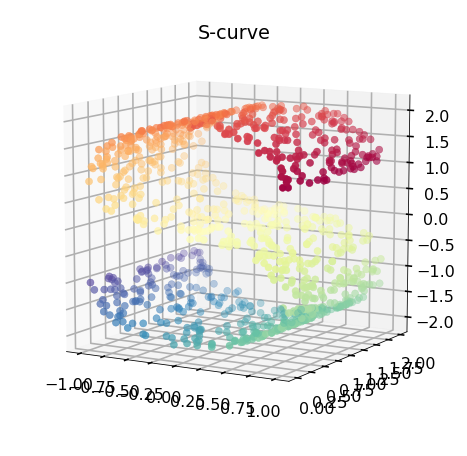

In [8]:
plot_3d_dataset(s_curve_data, s_curve_color, title='S-curve')

## Swiss Roll

In [9]:
swiss_roll_data, swiss_roll_color = datasets.samples_generator.make_swiss_roll(n_points,
                                                                               noise=0.2, random_state=random_state)

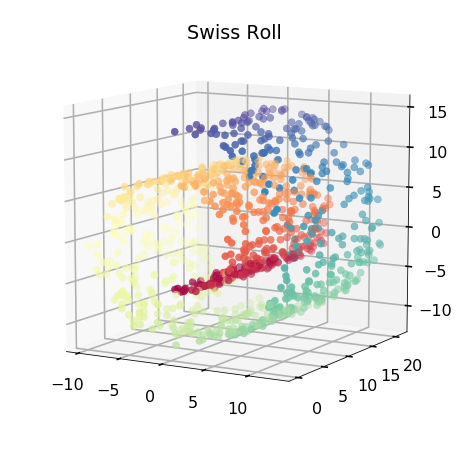

In [10]:
plot_3d_dataset(swiss_roll_data, swiss_roll_color, title='Swiss Roll')

## Gaussian Blobs

In [11]:
n_dim = 10
n_blobs = 4

In [12]:
blob_data, blob_labels = datasets.samples_generator.make_blobs(n_points,
                                                              centers=n_blobs, n_features=n_dim,
                                                              random_state=random_state)

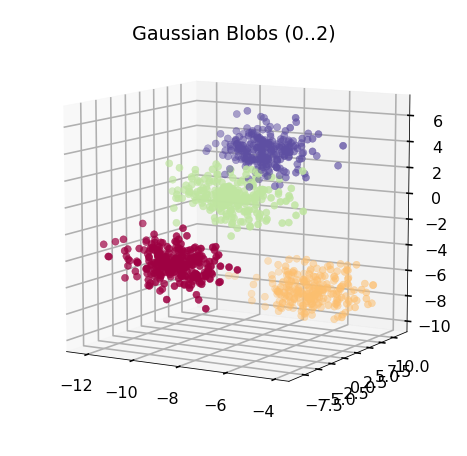

In [13]:
plot_3d_dataset(blob_data, blob_labels, title='Gaussian Blobs (0..2)')

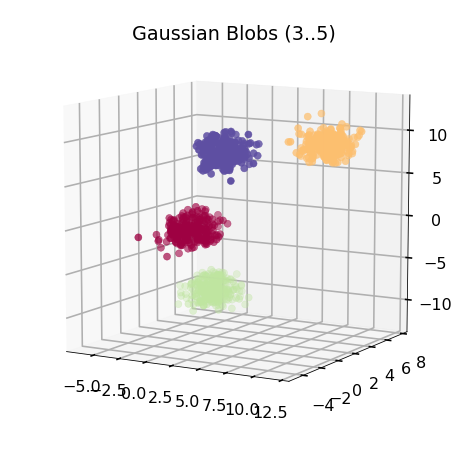

In [14]:
plot_3d_dataset(blob_data, blob_labels, title='Gaussian Blobs (3..5)', dim_list=[3, 4, 5])

## Surface of a Sphere

In [15]:
def sample_sphere_surface(n_points, n_dim=3, random_state=0):
    '''Sample on the surface of a sphere
    
    See Wolfram Sphere Point Picking
    (Muller 1959, Marsaglia 1972)
    
    Other ways to do this: http://www-alg.ist.hokudai.ac.jp/~jan/randsphere.pdf, 
    Use a very simple trick to color the points in a reasonable way
    '''
    
    np.random.seed(random_state)
    vec = np.random.randn(n_dim, n_points)
    vec /= np.linalg.norm(vec, axis=0)
    vec = vec.transpose()
    rgb = (vec + 1.0) / 2.0  # scale to a 0...1 RGB value
    color = (rgb[:, 0] + rgb[:, 1] + rgb[:, 2]) / 3.0
    
    return vec, color

In [16]:
sphere_data, sphere_color = sample_sphere_surface(n_points, random_state=random_state)

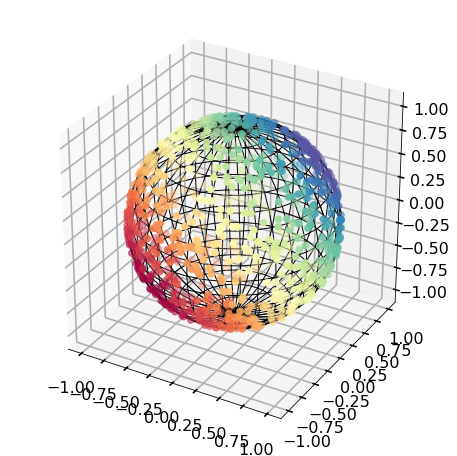

In [17]:
sphere_plot(sphere_data, sphere_color, wireframe=True)

In [18]:
def sample_ball(n_points, n_dim=3, random_state=0):
    '''Sample from a unit ball

    Sample uniformly and reject if outside the sphere
    '''
    
    np.random.seed(random_state)
    points = []
    labels = []
    while len(points) < n_points:
        pt = np.random.uniform(-1.0, 1.0, n_dim)
        if np.linalg.norm(pt) < 1.0:
            points.append(pt)
            labels.append(np.linalg.norm(pt))
    return np.array(points), np.array(labels)
    

In [19]:
ball_data, ball_color = sample_ball(n_points, random_state=random_state)

In [20]:
ball_color.shape

(1000,)

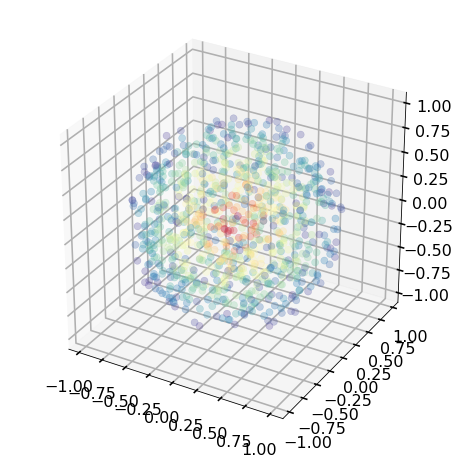

In [21]:
sphere_plot(ball_data, ball_color, alpha=0.3)

## Helix

In [22]:
def helix(major_radius, minor_radius, n_twists=20, n_points=1000):
    '''
    Sample from a toroidal helix. 
    
    https://math.stackexchange.com/questions/324527/do-these-equations-create-a-helix-wrapped-into-a-torus
    
    '''
    points = []
    labels = []
    steps = np.random.uniform(0, 2*np.pi, n_points)
    for t in steps:
        x = (major_radius + minor_radius * np.cos(n_twists*t)) * np.cos(t)
        y = (major_radius + minor_radius * np.cos(n_twists*t)) * np.sin(t)
        z = minor_radius * np.sin(n_twists * t)
        points.append((x,y,z))
        labels.append(t / 2 / np.pi)
    return np.array(points), np.array(labels)
        


In [23]:
data, colors = helix(1, .2, n_twists=40)

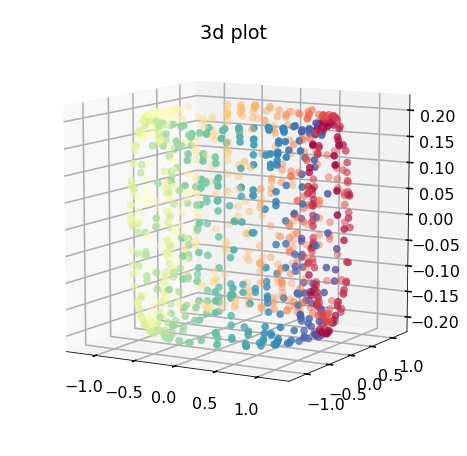

In [24]:
plot_3d_dataset(data, colors)